In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib
from matplotlib import pyplot as plt
plt.rc('font', size=50)          # controls default text sizes
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=40)    # legend fontsize
plt.rc('lines', markersize = 10)

matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 20, 14
plt.rcParams['figure.dpi'] = 40
matplotlib.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.which'] = "both"
props = dict(boxstyle='round', alpha=0.01)

In [2]:
def rg(J,Dj,Nj,nj,K,w):
    if K == 1:
        return J**2 * nj * 2 * (Dj - 2*w) / ((Dj - 2*w)**2 - J**2 / 4)
    else:
        return J**2 * nj * 2 * (Dj - 2*w) / ((Dj - 2*w)**2 - J**2 / 4) - (1/4)*J**3 * nj * Nj * K / ((Dj - 2*w)**2 - J**2 / 4)

19.19279482031655 55.55555555555556
0.08 6.0606060606060606


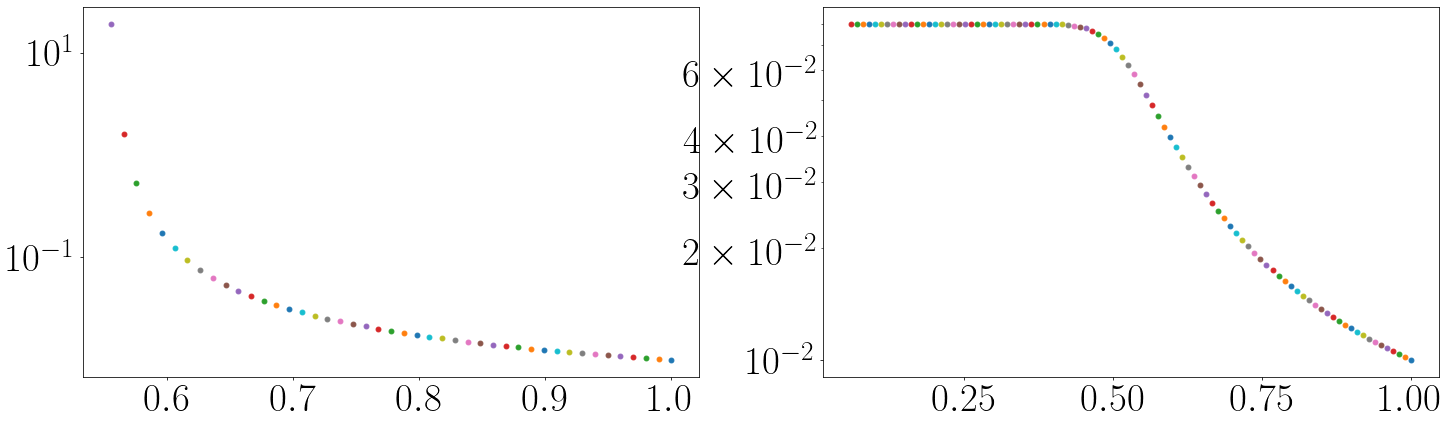

In [48]:
D0 = 1
K = 2
nj = 2
N = 100
Nmax = 30000
D = D0*np.linspace(N-1,0,N)/(N-1)
fig, ax = plt.subplots(1,2)
ind = 0
for K in [1, 2]:
    J = D0/100
    sig1 = sig2 = 0
    for Dj in D:
        Nj = Dj * N / D0
        w = -Dj/2
        ax[ind].scatter(Dj/D0, J, marker='.')
        if sig1 == 0:
            sig1 = 2*(Dj - 2*w) - J*K*Nj/4
            sig2 = (Dj - 2*w)**2 - J**2 / 4
            if sig1 * sig2 == 0:
                break
        else:
            if sig2 * ((Dj - 2*w)**2 - J**2 / 4) <= 0:
                break
            sig1 *= 2*(Dj - 2*w) - J*K*Nj/4
            sig2 *= (Dj - 2*w)**2 - J**2 / 4
        J += rg(J,Dj,Nj,nj,K,w)

    print (J, Nj)
    ax[ind].set_yscale("log")
    ind += 1
plt.show()


100%|██████████| 10/10 [01:31<00:00,  9.18s/it]


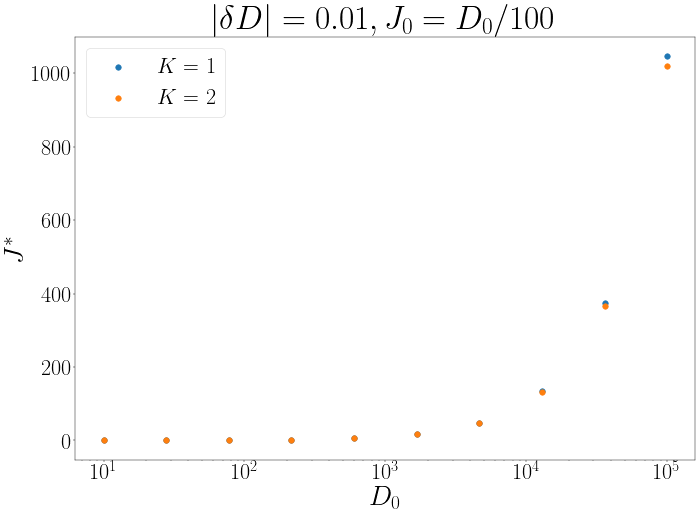

100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


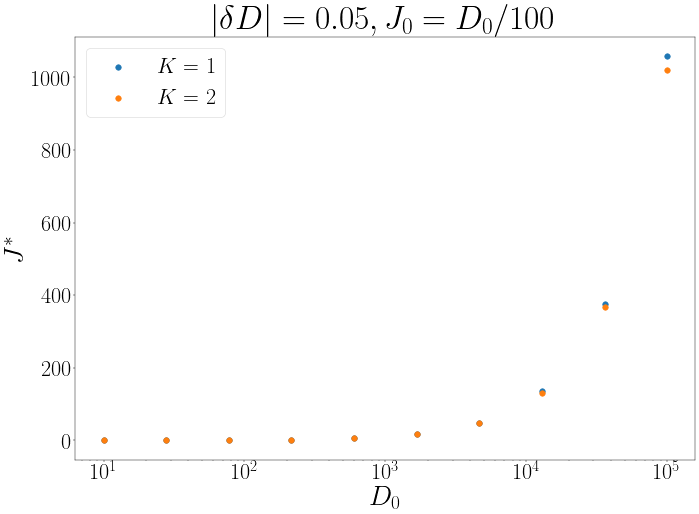

100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


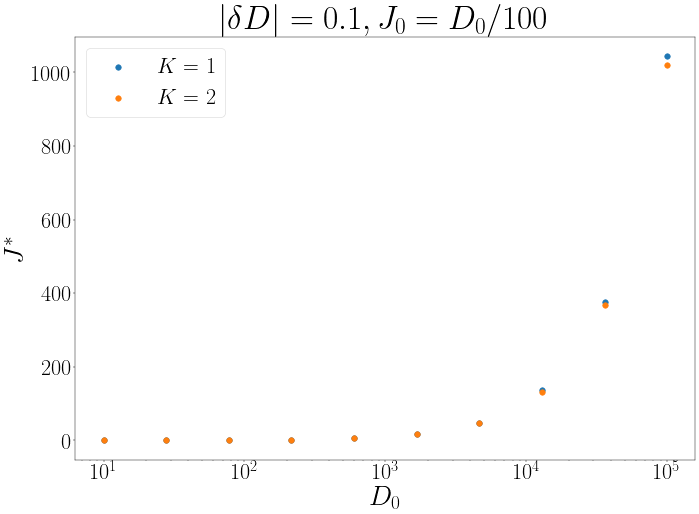

100%|██████████| 10/10 [00:01<00:00,  5.43it/s]


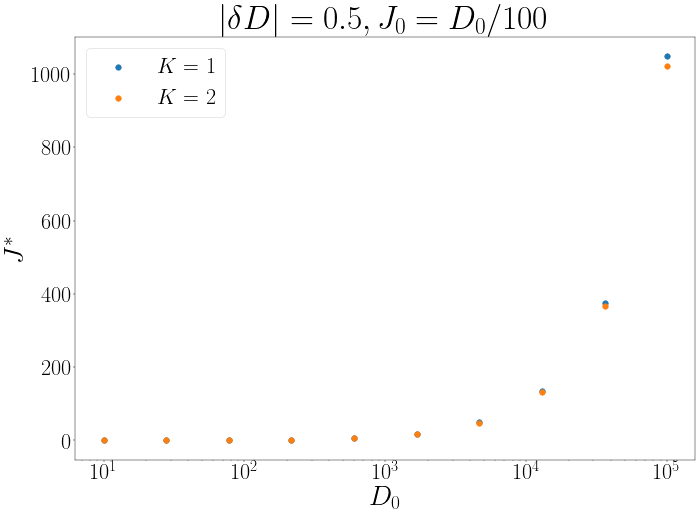

100%|██████████| 10/10 [00:00<00:00, 10.20it/s]


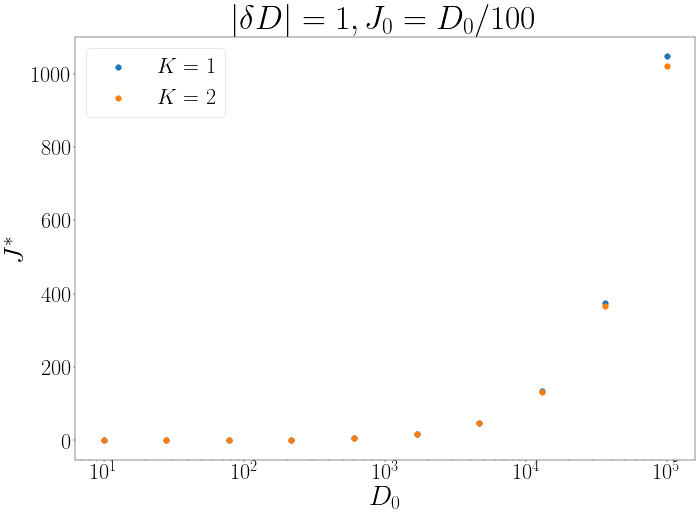

In [41]:
deltaD = 0.5
for deltaD in [0.01,0.05,0.1,0.5,1]:
    for K in [1, 2]:
        J_fp = []
        D_range = 10**np.linspace(1,5,10)
        for D0 in tqdm(D_range):
            J = D0/100
            N = int(D0*10)
            D = np.arange(D0, 0, -deltaD)
            rho = 1 / (2 * D0)
            nj = rho * deltaD
            sig = 4*D0**2 - J**2/4
            for Dj in D:
                Nj = rho * Dj
                w = (-Dj/2)*K
                if sig * (4*Dj**2 - J**2/4) <= 0:
                    break
                sig = 4*Dj**2 - J**2/4
                J += rg(J,Dj,Nj,nj,K,w)
            J_fp.append(J)
        plt.scatter(D_range, J_fp, label=r'$K={}$'.format(K))

    plt.title(r"$|\delta D| = {}, J_0 = D_0/100$".format(deltaD))
    plt.legend(loc=2)
    plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel(r"$D_0$")
    plt.ylabel(r"$J^*$")
    plt.savefig("deltaD={},J0=0.01D0.pdf".format(deltaD), bbox_inches="tight")
    plt.show()